### Modules we will use today: numerical python (numpy) , pandas, matplotlib 

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 

/Users/jpfaendt/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


### lets get some data! The next cell shows you a trick called *bash magic* to execute some bash commands directly from your Jupyter notebook!

Steps: 
1) Open your terminal and goto a directory where you can create a new python notebook  
    * A quick note about file management and a suggestion for this class 
2) Type "wget" and hit enter. If it says "command not found" you will use "`curl -O ...`" instead of wget  
3) launch a Jupyter notebook

In [ ]:
%%bash 

# examples
# ls, mkdir, etc..  you can make a whole bash script here 

wget prg.washington.edu/DIRECTfiles/first.csv

# ^ you might not have wget , if not use curl / curl.exe etc... we will see when we run the command 

curl -O "http://prg.washington.edu/DIRECTfiles/first.csv"

# It is completely fine if you just downloaded the files in a terminal instead of using the bash magic cell

### A workflow informed by how we would normally work with **graphing software**, which many would adopt by default...

1) Load the data that is basically ready for plotting  
2) Make a basic plot  
3) Spend some time improving the plot formatting so it is just how your advisor wants it  


<img src="http://www.phdcomics.com/comics/archive/phd030706s.gif">

## 1. Load the data 

* We saw when we clicked on the csv file that row 0 is a list of our headers 
* To support compatibilty with "numerical python" , many codes and programs by default save data for mathematical operations in the this format (# are comments), simple csv format, files arbitrarily long can be read into python in this manner

In [3]:
# use the numpy function genfromtxt to create a matrix containing all of our data
data=np.genfromtxt('first.csv',delimiter=',',comments='#')

In [4]:
# just some basic facts about the matrix we created and some operations on the matrix
print np.shape(data)
print np.size(data)
print data[:,0].sum()  #all rows, column 1 (index 0 = 1!)
print data[:,1].mean() #all rows, column 2 (index 1 = column 2!)

#Note: I am using Python 2.7 , Anaconda 4.2 - some of you may need to encapsulate 
# print statement in parentheses as:
print (np.shape(data))

#if you don't know , check your version: 
import sys
print(sys.version)

(99999, 2)
199998
412125.060162
-5.1776915612
(99999, 2)
2.7.12 |Anaconda 4.2.0 (x86_64)| (default, Jul  2 2016, 17:43:17) 
[GCC 4.2.1 (Based on Apple Inc. build 5658) (LLVM build 2336.11.00)]


### Well, since data actually represents two things, lets break it up into separate vectors so I can remember what the variable names are... 

In [5]:
pce=data[:,0]
ehomo=data[:,1]

## 2. Make a basic plot 

In [6]:
# needed to make sure we can take log of a very small number (i.e., zero). Just used for part of 
# the exercise and Python version compatibility. In general you should NOT do this unless you know why!

pce[ pce == 0 ]=1e-10

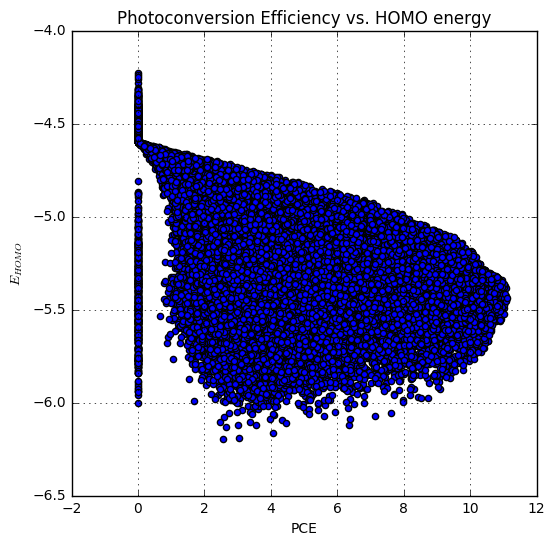

In [7]:
#A simple recipe for a scatterplot using matplotlib+pyplot 
#I will paste this into slack as a code snippet if you ask me to - so you don't have to type the whole thing! 
#Does everyone know why we are typing "plt.XXXXX" ? 
plt.figure(figsize=(6, 6))
plt.scatter(pce,ehomo,marker='o')
plt.title('Photoconversion Efficiency vs. HOMO energy')
plt.xlabel('PCE')
plt.ylabel('$E_{HOMO}$')
plt.grid()


### Two huge benefits to working with an environment like Jupyter for your data visualization 

1) Trivial to apply further operations to your data before plotting  
2) (_Usually_) trivial to customize any/all aspects of your plot

## 3. Make the plot better

### Working with a partner (one person watches / one person types) work through the following tasks (I will call switch) [_OK if you don't make it through everything_] 

1) Change the x-range to be 2-10 and yrange to be -6 to -2  
2) Change the font size to 18  
3) Plot it as a line instead of a scatter plot and no marker  
4) Plot $E_{HOMO}$ on the x-axis and plot log(PCE)\*0.5\*( ($E_{HOMO})^2)^{1/4}$  
    -> might need this `pce[ pce == 0 ]=1e-10`  
5) Plot this data as a red dashed line and also with green triangle  

* _I'll create a poll in #csmder - check off each one when you finish it _

** There is even an xkcd module in Matplotlib ** 

<img src="http://matplotlib.org/xkcd/_images/xkcd_00.png"> 


In [ ]:
# These are the answers to the above steps (commented out)

# plt.xlim([2,10])
# plt.rcParams.update({'font.size': 18})
# plt.plot
# plt.scatter(ehomo,np.log(pce)*.5*np.power(np.power(ehomo,2),0.25),marker='o')
#   plt.plot(pce,ehomo,'r--')
#   plt.scatter(pce,ehomo,marker='^',c='g')

### When you look for help online you will see there are many different ways to plot data with Matplotlib! 

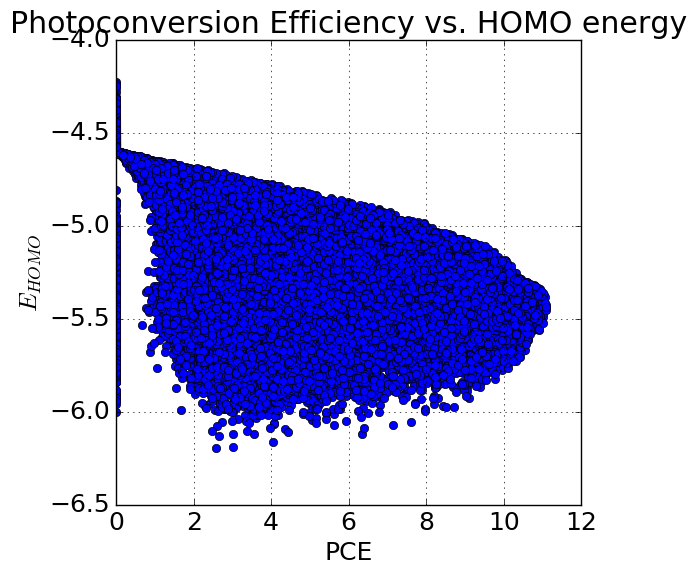

In [8]:
# you will see many tutorials in this format
# uses matplotlib but not pyplot 
# this is also quite convenient for composite figures (adding subplots - see HW)
fig = plt.figure(figsize=(6,6))
plt.rcParams.update({'font.size': 18})

axes = fig.add_subplot(111)
axes.plot(pce[::],ehomo[::],marker='o',ls='')
axes.set_xlabel('PCE')
axes.set_ylabel('$E_{HOMO}$')
axes.set_title('Photoconversion Efficiency vs. HOMO energy')
axes.grid()

#saving out your figure as a file - use a vector image format
#plt.savefig('fig.eps')

### Let's regroup - for a minute

* So far we have just tackled the "usual approach" (which follows the workflow we typically use with graphing software) 
    * What went well w/that?
    * What could be improved in light of using a programming environment like python?


### A superior way is to directly read in your data as a Pandas dataframe

* Lets try this with a more complicated file

In [9]:
%%bash 

# Some bash magic to get a different file  
#wget faculty.washington.edu/jpfaendt/jimsfile.csv 

head -n 10 jimsfile.csv

"id","SMILES_str","stoich_str","mass","pce","voc","jsc","e_homo_alpha","e_gap_alpha","e_lumo_alpha","tmp_smiles_str"
"655365","C1C=CC=C1c1cc2[se]c3c4occc4c4nsnc4c3c2cn1","C18H9N3OSSe","394.3151","5.16195320211971","0.86760078740294","91.5675749599","-5.46760078740294","2.02294443593306","-3.44465635146988","C1=CC=C(C1)c1cc2[se]c3c4occc4c4nsnc4c3c2cn1"
"1245190","C1C=CC=C1c1cc2[se]c3c(ncc4ccccc34)c2c2=C[SiH2]C=c12","C22H15NSeSi","400.4135","5.2613977233692","0.50482419467609","160.40154923845","-5.10482419467609","1.63075003826037","-3.47407415641572","C1=CC=C(C1)c1cc2[se]c3c(ncc4ccccc34)c2c2=C[SiH2]C=c12"
"21847","C1C=c2ccc3c4c[nH]cc4c4c5[SiH2]C(=Cc5oc4c3c2=C1)C1=CC=CC1","C24H17NOSi","363.4903","0","0","197.47477990435","-4.53952567287262","1.46215815756611","-3.07736751530651","C1=CC=C(C1)C1=Cc2oc3c(c2[SiH2]1)c1c[nH]cc1c1ccc2=CCC=c2c31"
"65553","[SiH2]1C=CC2=C1C=C([SiH2]2)C1=Cc2[se]ccc2[SiH2]1","C12H12SeSi3","319.4448","6.13829369542661","0.63027445338351","149.88754514825","-5.230274

In [11]:
pddata.describe()
pddata.mass.mean()

398.43809247394705

In [10]:
pddata=pd.read_csv('jimsfile.csv')

### This file is the first 100K lines of the HCEPDB 

Try to load it as a numpy object like we did with first.csv" 
 
     `data2=np.genfromtxt('jimsfile.csv',delimiter=',',comments='#')`
 
 then lets look at the first 10 lines...
 
     `data2[0:10,:]`
 
**Fail.** Instead, lets load it as a pandas data frame like you did this morning 
 
     `pddata=pd.read_csv('jimsfile.csv')`
 
 and lets look at the first 10 lines...
 
    `pddata[0:10]`

or lines 20-30

    `pddata[20:30]`

But don't forget you actually just looked at the 21st-30th lines ;) 

### Working alone use the knowledge that data from the pandas object can be accessed as "pddata.ID" (e.g., pddata.pce) and recreate the plot we mave above (PCE vs E_homo)

Steps: 

* Copy-paste old code snippet 
* Study the command and replace the correct variables


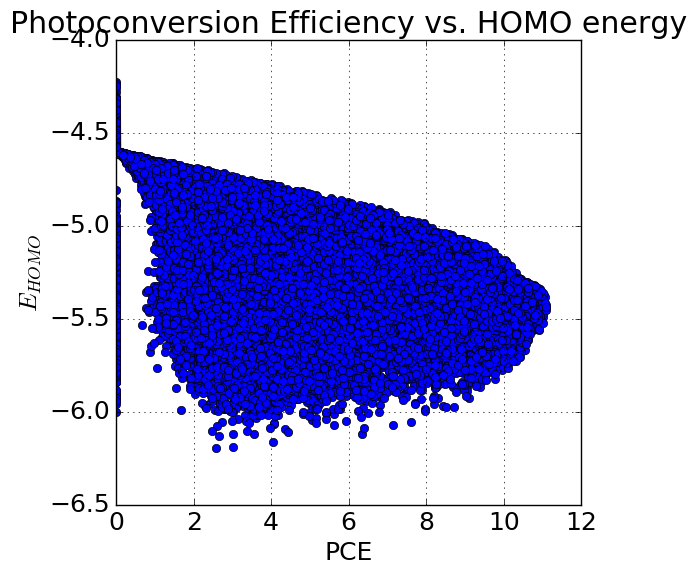

In [13]:
fig = plt.figure(figsize=(6,6))
plt.rcParams.update({'font.size': 18})

axes = fig.add_subplot(111)
axes.plot(pddata.pce,pddata.e_homo_alpha,marker='o',ls='')
axes.set_xlabel('PCE')
axes.set_ylabel('$E_{HOMO}$')
axes.set_title('Photoconversion Efficiency vs. HOMO energy')
axes.grid()

# in class we discussed how to visualize this data more sparsley, say every 100th point: 
# axes.plot(pddata.pce[::100],pddata.e_homo_alpha[::100],marker='o',ls='')


### Like Dave showed this morning - the pandas data frame can be directly plotted with one command: 

Type this in a new cell: 
`pddata.plot.scatter(['pce'],['e_homo_alpha'])`

* Some, but not all, options can be directly entered with this command. For example:
    `pddata.plot.scatter(['pce'],['e_homo_alpha'],figsize=(6,6))     `

* But the command can be used with _both_ methods described above for full customization within Matplotlib

#### Level up - taking a quick look at all your data

`from pandas.tools.plotting import scatter_matrix
pddata=pd.read_csv('jimsfile.csv')
scatter_matrix(csv_data, alpha=0.05, figsize=(18, 18), diagonal='kde')
pass
plt.show()`

In [ ]:
from pandas.tools.plotting import scatter_matrix

pddata=pd.read_csv('jimsfile.csv')
scatter_matrix(pddata, alpha=0.05, figsize=(10,10), diagonal='kde')
pass
plt.show()


## Below here is what we covered W2L2 (Wed 1/11)

### Moving beyond scatter and line plots , lets go through a more complicated example that also illustrates plotting countour plots

<img src="http://prg.washington.edu/DIRECTfiles/PES_comparisons.jpg">

#### A comparison of potential energy surfaces calculated with different methods for a symmetric SN2 reaction from DOI: 10.1021/acs.jpca.5b10667

The data files for panel A and B, as well as the other data files you will need for the beginning statistics lecture can be downloaded from the same directories we used on Monday (1/9/17), the filename is W2L2.zip and it is located at http://prg.washington.edu/DIRECTfiles/W2L2files.zip

#### Your choice: 
1) Goto terminal and download the file and unzip it  
2) Write a bash magic cell to download the file and unzip it  
3) Look at the first 10 lines of the file  
#### The data are formatted as I noted above (ready to be loaded with numpy or pandas). 
#### Note there is no header column in the text file and it is space, not comma, delimited


In [15]:
panelA=pd.read_csv('panelA.dat',delimiter=' ',names=["D1","D2","PE"])
# D1, D2 = bond distances in nm , PE = energy in kcal/mol
panelA[0:4]

,D1,D2,PE
0,0.154535,0.154135,0.0
1,0.154535,0.158420,0.0
2,0.154535,0.162704,0.0
3,0.154535,0.166989,0.0


### This data is clearly a list of x/y/z data. If you inspect it you can see that like a typewriter the values of y and z change at fixed values of x, then x is updated. A logical way to write out a complex array from a separate code - but how do we turn it into a countour plot? 

### The data represent an NxM matrix of information. That is, there are N unique values of x and M unique values of y and some value z for each x/y combination.  But we cannot contour plot using this information directly

### The Matplotlib module "contourf" requires three key inputs - separate X,Y,Z. the X and Y are matrices of dimension MxN describing our range of independent variables (the N and M points, respectively) and Z is an NxM matrix with the PES entries in it (the dependent variables) 

### Numpy has a utility called "reshape" (there is an identical tool in Matlab) for this purpose.  The main inputs are N and M 

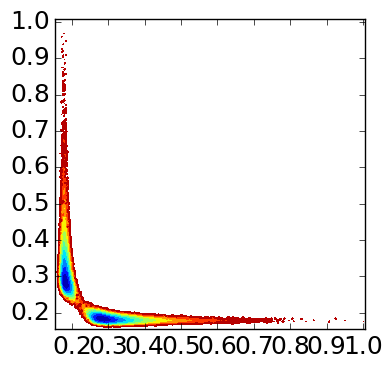

In [16]:
### Lets make a basic contour plot using matplotlib 
N=200 # how many rows in X do you have? (how can we learn this from our actual data?)
M=200 # how many rows in Y do you have? 

### process the data for countourf plotting
X=np.reshape(panelA.D1,[N,M]) #output = NxM matrix value of our X's 
Y=np.reshape(panelA.D2,[N,M]) #output = NxM matrix of our Y's 
Z=np.reshape(panelA.PE-panelA.PE.min(),[N,M]) #output = NxM matrix of unique z values

### I'll explain this 
spacer = 1
lines = 10 

#this is a vector with our energy levels (energy = Z) created with the numpy function "linspace" 
#10 lines at a spacing of 1 kcal/mol = a range of 0 to 10 kcal/mol
#when I use this as my energy level input, then all energy values > 10 will be colored as though they are 10 
levels=np.linspace(0,lines*spacer,num=(lines+1),endpoint=True)

### A very basic plot 
fig=plt.figure(figsize=(4,4)) 
axes = fig.add_subplot(111)
plt.contourf(X,Y,Z, levels)

### Options that will make it look just like the other one 
#plt.contourf(X, Y, Z, levels, cmap=plt.cm.bone)
#plt.colorbar()
#plt.xlabel('$d1$')
#plt.ylabel('$d2$')
#plt.ylim([.1,.5])
#plt.xlim([0.1,0.5])
#plt.rcParams.update({'font.size': 8})

#### With a partner, make the panel B graphic

#### The input data correspond to a square matrix (N=M) , but I will not tell you whether or not it is the same dimensionality 

#### Use only python commands to determine N and M 

#### Panel B's distances are in Angstrom but energies in kcal/mol

    D1     D2        PE
0  1.5  1.500  153.2230
1  1.5  1.605  112.1040
2  1.5  1.710   79.8973
3  1.5  1.815   53.4140


/Users/jpfaendt/anaconda/lib/python2.7/site-packages/pandas/core/series.py:851: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return self._values.reshape(shape, **kwargs)


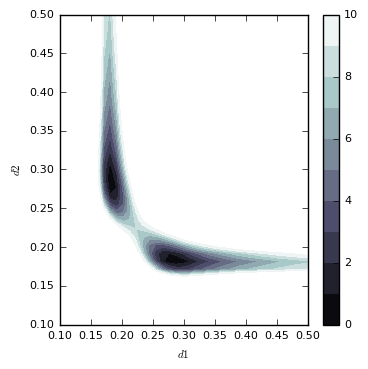

In [2]:
# READ IN THE DATA JUST LIKE BEFORE
panelB=pd.read_csv('panelB.dat',delimiter=' ',names=["D1","D2","PE"])
# D1, D2 = bond distances in Angstrom , PE = energy in kcal/mol
print panelB[0:4]
N=np.power(panelB.D1.shape[0],0.5)
M=N

# MAKE THE SAME PLOT AS BEFORE

### process the data for countourf plotting
X=np.reshape(panelB.D1/10.0,[N,M])
Y=np.reshape(panelB.D2/10.0,[N,M])
Z=np.reshape(panelB.PE-panelB.PE.min(),[N,M])

### I'll explain this 
spacer = 1
lines = 10 
levels=np.linspace(0,lines*spacer,num=(lines+1),endpoint=True)

### A very basic plot 
fig=plt.figure(figsize=(4,4)) 
axes = fig.add_subplot(111)

plt.contourf(X, Y, Z, levels, cmap=plt.cm.bone)
plt.colorbar()
plt.xlabel('$d1$')
plt.ylabel('$d2$')
plt.ylim([.1,.5])
plt.xlim([0.1,0.5])
plt.rcParams.update({'font.size': 8})


## A note of caution about visually comparing contour plots! 

## You control the color scale, countour widths, everything so it is critical to use the same gradation of values when plotting different data sets (because human eyes will always compare and contrast based on color! 

### Final step: we would like to make visualize the difference between these two energy surfaces.  The scientifc purpose of this visualization is to evaluate whether there are significant differences in the calculation of the energy surface with two different simulation methods 

* In a perfect world we could just subtract the two matrices Z from each other 
* But we had to reshape (grid) the data according to their input sizes (200x200 and 39x39)
* We should probably reduce the resolution of Panel A to map it into a 39x39 grid (vs. interpolating points on the 39x39 grid).  But both solutions are actually fine 
* There is a module in python that will allow us to do this trivially:  griddata
    * Process:   
        1) Create a new X/Y vector that will be used for re-gridding both panelA and panelB (_there is a minor technical reason why this leads to more success than simply using the original X/Y from panelA - ask me now if you care..._)  
        2) Create new Z matrices that are re-gridded on Xnew/Ynew  
        3) Contour plot the difference   

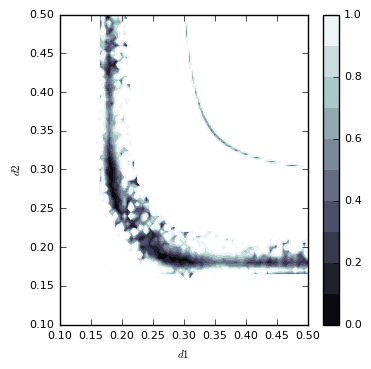

In [18]:
# we need to two modules to our software stack in order to do this 
from scipy.interpolate import interp1d
from scipy.interpolate import griddata

# create a new grid and mesh off of panelB 
sig=.05 # spacing 
method='cubic' #there are different interpolation methods - they all give the same result for this example

# create new list of x's and y's - the basis for our gridding 
# lookup the tool np.arange if you want to know what it does, or 
# type "np.arange(  then hit shift-tab to get help 

newxlist=np.arange(panelB.D1.min()+0.1,panelB.D1.max(),sig)
newylist=np.arange(panelB.D2.min()+0.1,panelB.D2.max(),sig)

# the actual meshgrid command 
Xnew,Ynew=np.meshgrid(newxlist,newylist)
PBZnew=griddata(panelB[['D1','D2']],panelB.PE-panelB.PE.min(),(Xnew, Ynew),method=method)

# use the same grid to regrid panelA
PAZnew=griddata(panelA[['D1','D2']],panelA.PE-panelA.PE.min(),(Xnew/10.0, Ynew/10.0),method=method)

# The energy levels are almost exact - so reduce linespacing by 10X
spacer=0.1 
lines=10 #this goes to 80 kcal/mol (2*40)
levels=np.linspace(0,lines*spacer,num=(lines+1),endpoint=True)

fig=plt.figure(figsize=(4,4)) 
axes = fig.add_subplot(111)
plt.contourf(Xnew/10.0, Ynew/10.0, np.abs(PBZnew-PAZnew), levels, cmap=plt.cm.bone,)
plt.colorbar()
plt.xlabel('$d1$')
plt.ylabel('$d2$')
axes.set_ylim([.1,.5])
axes.set_xlim([0.1,0.5])
plt.rcParams.update({'font.size': 8})
plt.show()

## Wrap up Python section 

### Have a quick look at <a href="http://matplotlib.org" target="_blank"> Matplotlib</a> website... examples examples examples!

### Any remaining questions? 

### Briefly explain the example below (several new things) and what it does 

### Practice this week w/HW! 

### Back to PPT - Molecular visualization 

### Another example (if time or on your own) 

#### This example is adopted from YouTube Pandas / machine learning tutorial (channel = Roshan). The main purpose is to show a few more visualization examples.  Namely:  Pandas scatter matrix and how to visualize / color symbols using other data 

In [ ]:
### Get some census data 

url = "http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
path = "data/adult.data"
columns = [
    "age",
    "workclass",
    "fnlwgt",
    "education",
    "education-num",
    "marital-status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "capital-gain",
    "capital-loss",
    "hours-per-week",
    "native-country",
    "income"
    ]
csv_data = pd.read_csv(url, sep=", ", names=columns, nrows=1000,engine='python').dropna()

In [ ]:
csv_data.describe()

In [ ]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(csv_data, alpha=0.05, figsize=(18, 18), diagonal='kde'); 

In [ ]:
plt.scatter(
    csv_data[csv_data['income']=='>50K']['education-num'],
    csv_data[csv_data['income']=='>50K']['age'],
    alpha=0.1,
    label='>50K',
    color='r'
    )

plt.scatter(
    csv_data[csv_data['income']=='<=50K']['education-num'],
    csv_data[csv_data['income']=='<=50K']['age'],
    alpha=0.05,
    label='<=50K',
    color='b'
    )
plt.xlabel('income')
plt.ylabel('age')
plt.legend()
plt.show()